Job Role Prediction

 Team members: Girija Kondapally, Manasa Cherukupally, Durga Phani Vikas Telu, Shiva Chttimalla, Rahil Mohammed Zuhair
        

Load the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("career.csv")
print(np.shape(df))
df.head()

(15493, 15)


,OperatingSystems,Algorithms,Programming Concepts,SoftwareEngineering,ComputerNetworks,Mathematics,Communication skills,hackathons,coding_skills_rating,public_speaking,certifications,Leadership,Management_or_Technical,Team_player,Suggested_Job_Role
0,69,63,78,87,94,84,61,0,4,8,shell programming,no,Management,yes,Database Developer
1,78,62,73,60,71,84,91,1,2,3,machine learning,yes,Technical,no,Portal Administrator
2,71,86,91,87,61,72,94,4,1,3,app development,yes,Management,no,Portal Administrator
3,76,87,60,84,89,88,69,1,2,5,python,no,Management,yes,Systems Security Administrator
4,92,62,90,67,71,71,73,4,6,3,app development,yes,Management,yes,Business Systems Analyst


In [3]:
df.describe()

,OperatingSystems,Algorithms,Programming Concepts,SoftwareEngineering,ComputerNetworks,Mathematics,Communication skills,hackathons,coding_skills_rating,public_speaking
count,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,77.019880,77.020848,77.054993,77.128639,76.946169,76.901117,76.889047,2.989027,5.009746,4.998774
std,10.069786,10.107588,10.133148,10.087247,10.033018,10.157902,10.121755,2.005900,2.573118,2.575819
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,6.000000,9.000000,9.000000


In [4]:
df.dtypes

OperatingSystems            int64
Algorithms                  int64
Programming Concepts        int64
SoftwareEngineering         int64
ComputerNetworks            int64
Mathematics                 int64
Communication skills        int64
hackathons                  int64
coding_skills_rating        int64
public_speaking             int64
certifications             object
Leadership                 object
Management_or_Technical    object
Team_player                object
Suggested_Job_Role         object
dtype: object

Initial visualization

<AxesSubplot:>

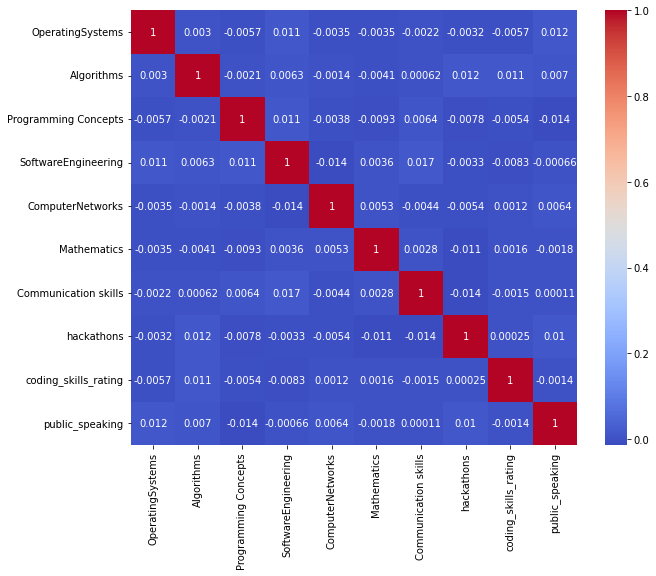

In [5]:
#correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Display the correlation matrix using Seaborn's heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

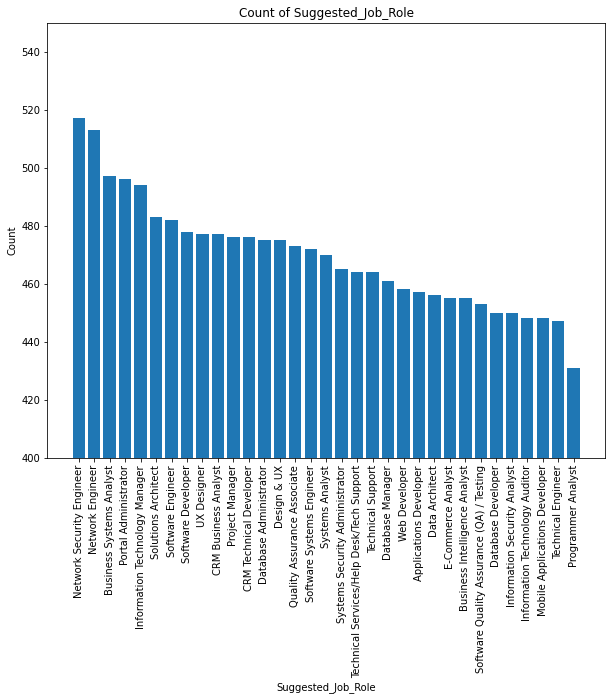

In [6]:
#Bar plot showing job count

# Count the occurrences of each unique value in the column
value_counts = df['Suggested_Job_Role'].value_counts()
plt.figure(figsize=(10, 8))
# Create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Suggested_Job_Role')
plt.ylabel('Count')
plt.title('Count of Suggested_Job_Role')

# Set y-axis limits
plt.ylim(400, 550)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

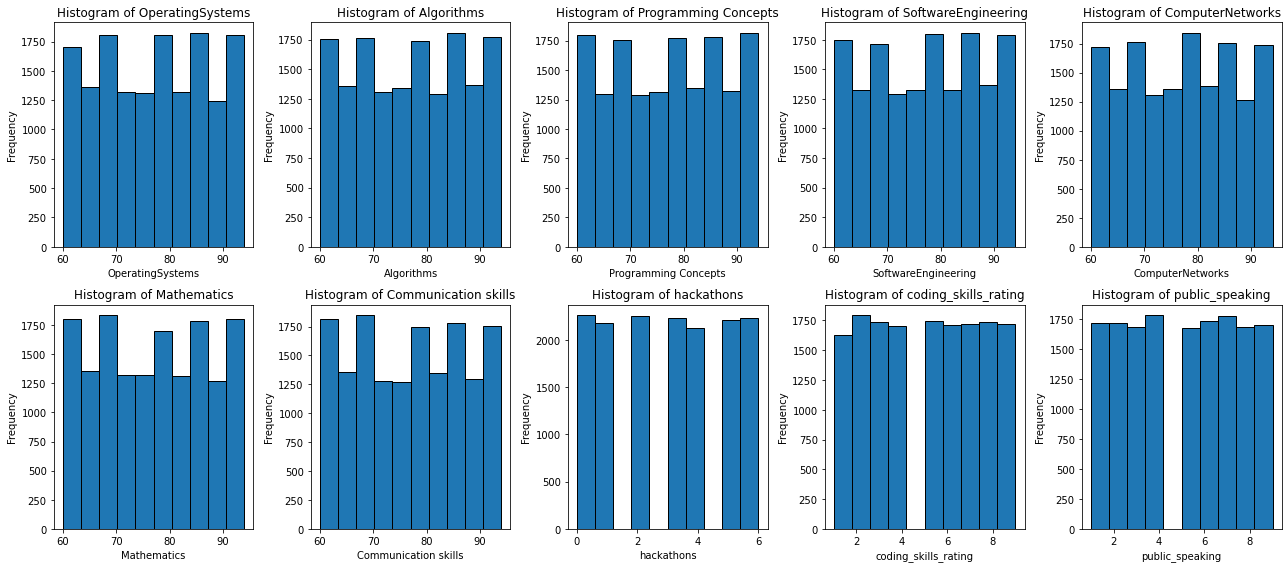

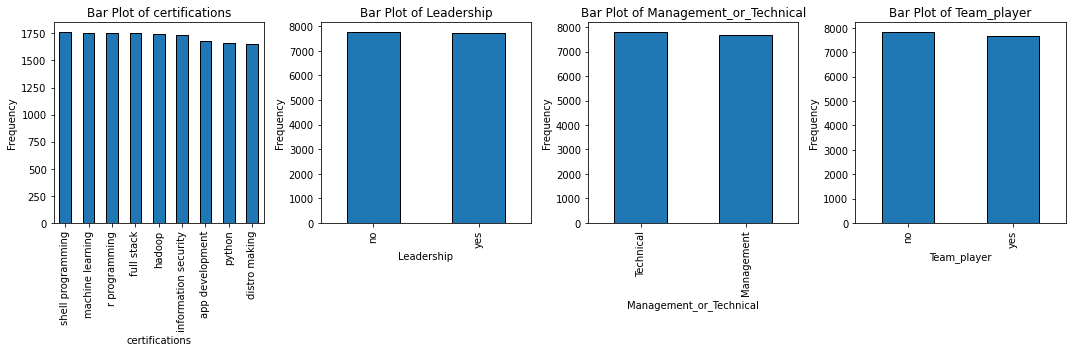

In [7]:
#histogram for variables showing data distribution

# List of specific column names to create histograms for
cols = ['OperatingSystems', 'Algorithms', 'Programming Concepts', 'SoftwareEngineering', 'ComputerNetworks', 'Mathematics', 'Communication skills','hackathons','coding_skills_rating','public_speaking']

# Create subplots with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(18, 8)) 

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()


for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=10, edgecolor='black')  
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



#Bar plot showing count of unique values in variables
cols=['certifications','Leadership','Management_or_Technical','Team_player']

# Calculate unique values for each column
unique_values = df[cols].nunique()

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  

axes = axes.flatten()


for i, col in enumerate(cols):
    # Calculate value counts for unique values in the column
    value_counts = df[col].value_counts()
    
    # Create bar plot on the subplot
    value_counts.plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()    

Data Preprocessing

In [8]:
df.isnull().sum()

OperatingSystems           0
Algorithms                 0
Programming Concepts       0
SoftwareEngineering        0
ComputerNetworks           0
Mathematics                0
Communication skills       0
hackathons                 0
coding_skills_rating       0
public_speaking            0
certifications             0
Leadership                 0
Management_or_Technical    0
Team_player                0
Suggested_Job_Role         0
dtype: int64

In [9]:
data = df.iloc[:,:-1].values
label = df.iloc[:,-1]

data normalization

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in range(10,14):
    data[:,i] = labelencoder.fit_transform(data[:,i])
#Normalizing the data
from sklearn.preprocessing import Normalizer
data1=data[:,:10]
normalized_data = Normalizer().fit_transform(data1)
data2=data[:,10:]
df1 = np.append(normalized_data,data2,axis=1)
df2=df.iloc[:,:-1]
dataset = pd.DataFrame(df1,columns=df2.columns)

In [11]:
label = df.iloc[:,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["Suggested_Job_Role"])
numeric=y["Suggested_Job_Role"].unique() 
Y = pd.DataFrame({'Suggested_Job_Role':original, 'Associated Number':numeric})
X = pd.DataFrame(df1,columns=["OperatingSystems","Algorithms","Programming Concepts","SoftwareEngineering","ComputerNetworks","Mathematics","Communication skills","hackathons","coding_skills_rating","public_speaking","certifications","Leadership","Management_or_Technical","Team_player"])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


Data Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)


Classification Models

In [15]:
#Gradient Boosting Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Create the GradientBoostingClassifier with Gaussian loss
gbgd_classifier = GradientBoostingClassifier(loss='log_loss', n_estimators=100, random_state=42)

# Train the model
gbgd_classifier.fit(X_train,np.array(y_train).ravel())

# Make predictions on the test set
y_pred = gbgd_classifier.predict(X_test)

# Calculate accuracy
accuracy_gbc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy_gbc)

Accuracy: 3.259115843820587


In [23]:
#Naive Bayes

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
rb_clf=GaussianNB()
rb_clf.fit(X_train,np.array(y_train).ravel())
pred=rb_clf.score(X_test,y_test)
accuracy_nb=pred*100
print(accuracy_nb)


3.904485317844466


In [17]:
#Support Vector Machine Classifier

from sklearn.svm import SVC
svc=SVC() 
svc.fit(X_train,np.array(y_train).ravel())
y_pred=svc.predict(X_test)
accuracy_svc=accuracy_score(y_test,y_pred)*100
print(accuracy_svc)

3.1945788964181996


In [24]:
#Decision Tree Classifier

from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred)*100

print(accuracy_dt)


3.130041949015812


In [19]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, np.array(y_train).ravel())

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy_rf)

Accuracy: 2.6460148434979023


In [20]:
#Ada Boosting Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the base classifier (in this case, a decision tree)
base_classifier = DecisionTreeClassifier(max_depth=3)

# Create the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42)

# Train the model
adaboost_classifier.fit(X_train, np.array(y_train).ravel())

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy_ada)

Accuracy: 3.0009680542110355


In [21]:
#K Nearest Neighbour Classifier


from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn_classifier.fit(X_train, np.array(y_train).ravel())

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)


# Evaluate the model's performance
accuracy_knc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy_knc)

Accuracy: 3.0655050016134235


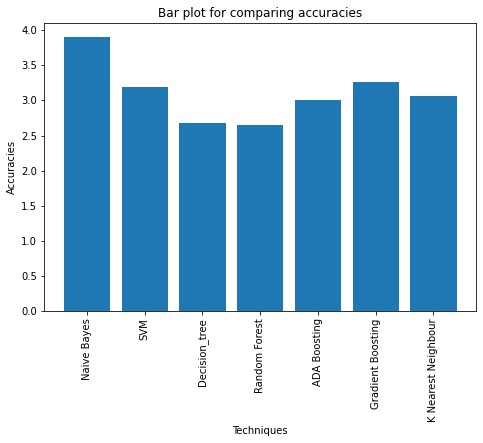

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Name = ['Naive Bayes', 'SVM','Decision_tree', 'Random Forest','ADA Boosting','Gradient Boosting','K Nearest Neighbour']
accuracies = [accuracy_nb,accuracy_svc,accuracy_dt,accuracy_rf,accuracy_ada,accuracy_gbc,accuracy_knc]
ax.bar(Name,accuracies)
ax.set_ylabel('Accuracies')
ax.set_xlabel('Techniques')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.title("Bar plot for comparing accuracies")
plt.show()